<a href="https://colab.research.google.com/github/jcdumlao14/Supervised-Learning-Algorithms--Classification/blob/main/4_Micro_Courses_Supervised_Algorithms_Classification_Exercises_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest**

**Random forests or random decision forests** is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees
https://en.wikipedia.org/wiki/Random_forest


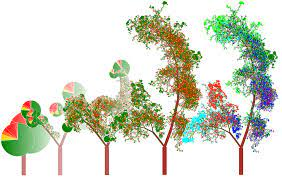

# **Objective**

Predict the flower species in Iris Dataset using Random Forest Classifier.


**Tasks**
--

1. Import the iris dataset from sklearn.datasets
2. Create a DataFrame of the input and target values
3. Split into train and test sets with ratio 80:20
4. Train the random forest classifier with default parameters
5. Tweak the parameters(no. of trees etc) and try to achieve the maximum accuracy possible
6. How many trees give the best accuracy?

# **Loading Libraries**

In [2]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from matplotlib import style
#styling the outputs
font={'family':'sans-serif',
      'weight':'bold',
      'size':18}
plt.rc('font',**font)
style.use('fivethirtyeight')

# **Loading Data**

Pandas module is used for reading files. We have our data in '.csv' format. We will use 'read_csv()' function for loading the data.

In [3]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

## Understanding Data

Let's see what our data look like.

In [4]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


It's a good idea to always explore our data a bit, so we know what we work with. Here, we can see the first five rows of the dataset are printed, as well as the target variable for the whole dataset.

In [5]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Here, we can create a DataFrame of the iris dataset the following way.

In [6]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


First, we will separate the columns into dependent and independent variables (or features and labels). Then you split those variables into a training and test set.

In [7]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test our ration 80:20


After splitting, we can train the model on the training set and perform predictions on the test set.

In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

After training, check the accuracy using actual and predicted values.

In [9]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


we can also make a prediction for a single item, for example:

* sepal length = 2
* sepal width = 3
* petal length = 4
* petal width = 5

Now we can predict which type of flower it is.

In [10]:
clf.predict([[2, 3, 4, 5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2])

Here, 1 indicates the flower type versicolor.


In [11]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


RandomForestClassifier()

In [12]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.446306
petal width (cm)     0.414861
sepal length (cm)    0.106325
sepal width (cm)     0.032508
dtype: float64

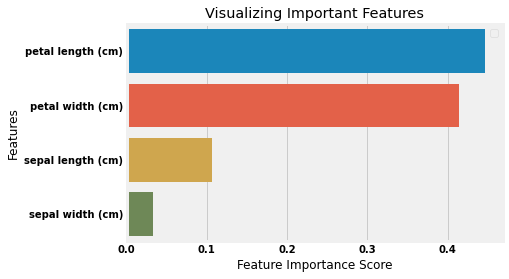

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

After splitting, we can generate a model on the selected training set features, perform predictions on the selected test set features, and compare actual and predicted values.

In [16]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


We now see that after removing the least important features (sepal length), the accuracy increased. This is because you removed misleading data and noise, resulting in increased accuracy. A lesser amount of features also reduces the training time.

### **Thanks for reading the Notebook!!!**